```
    __
   (__      /_      _        /
  (__  (_/ (   (-  (  /) (- . 
                     /
```

## Chord Identification Experiments

Experiments on Generating Chord series  
Author: `@hughshuwang` 

In [39]:
%matplotlib inline

from __future__ import print_function

import IPython.display as ipd

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from presets import Preset

import librosa as rs
import librosa.feature as ft
import librosa.effects as ef
import librosa.display as dp
import librosa.segment as sg
import librosa.decompose as dc

import sklearn.cluster

import torch
import torch.nn as nn
import torch.functional as F

SAMPLE_RATE = 22050

file = '../data-raw/sample.m4a'
y, sr = rs.load(file, sr = SAMPLE_RATE, duration=10, offset=0.0)

# mel_highres = feature.melspectrogram(y, n_fft=2**11, hop_length=512)
# mel_db = rs.power_to_db(mel_highres, ref=np.max)

# plt.figure(figsize=(12, 3)) # ax = plt.subplot(3, 1, 1)
# plt.subplot(3, 1, 2, sharex=ax, sharey=ax)
# display.specshow(mel_db, y_axis='mel', x_axis='time', hop_length = 512)
# plt.title('44100/1024/4096')

In [40]:
y_h, y_p = ef.hpss(y, margin=(1.0, 3.0))
# ipd.Audio(y_h, rate = sr)

tempo_h, beats_h = rs.beat.beat_track(y=y_h, sr=sr, trim=False)
cqt_h = rs.amplitude_to_db(np.abs(rs.cqt(y, sr)), ref=np.max)
cqt_h_sync = rs.util.sync(cqt_h, beats_h, aggregate=np.mean)

beat_h_times = rs.frames_to_time(
    rs.util.fix_frames(beats_h, x_min=0, 
                       x_max=cqt_h.shape[1]), sr=sr)

cqt_h_sync = rs.util.sync(cqt_h, beats_h, aggregate=np.median)


tempo_p, beats_p = rs.beat.beat_track(y=y_p, sr=sr, trim=False)
cqt_p = rs.amplitude_to_db(np.abs(rs.cqt(y, sr)), ref=np.max)
cqt_p_sync = rs.util.sync(cqt_p, beats_p, aggregate=np.mean)

beat_p_times = rs.frames_to_time(
    rs.util.fix_frames(beats_p, x_min=0, 
                       x_max=cqt_p.shape[1]), sr=sr)

cqt_p_sync = rs.util.sync(cqt_p, beats_p, aggregate=np.median)

#### CQT_SYNC Spectrum

Text(0.5,1,'Percurssive CQT Sync')

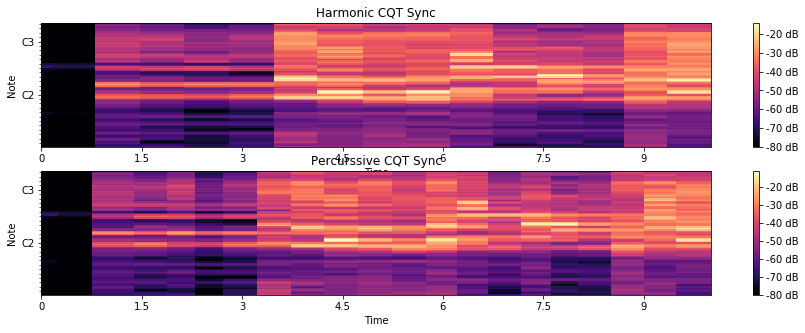

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
dp.specshow(cqt_h_sync, bins_per_octave=12*3, 
            y_axis='cqt_note', x_axis='time', 
            x_coords=beat_h_times)
plt.colorbar(format='%+2.0f dB')
plt.title("Harmonic CQT Sync")
plt.subplot(2, 1, 2)
dp.specshow(cqt_p_sync, bins_per_octave=12*3, 
            y_axis='cqt_note', x_axis='time', 
            x_coords=beat_p_times)
plt.colorbar(format='%+2.0f dB')
plt.title("Percurssive CQT Sync")

#### Chroma Spectrum

In [42]:
chroma_h = ft.chroma_stft(y_h, sr, n_chroma=12, n_fft=4096)
chroma_p = ft.chroma_stft(y_p, sr, n_chroma=12, n_fft=4096)

Text(0.5,1,'Percurssive')

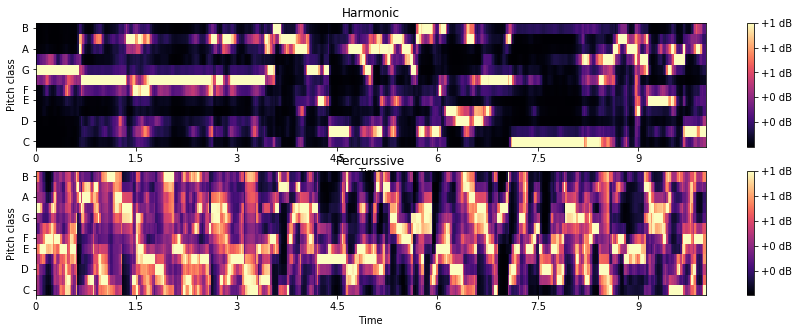

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
dp.specshow(chroma_h, y_axis='chroma', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Harmonic")
plt.subplot(2, 1, 2)
dp.specshow(chroma_p, y_axis='chroma', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Percurssive")

#### Spec HPSS

In [ ]:
H, P = map(lambda x: rs.amplitude_to_db(np.abs(x), ref=np.max), 
           dc.hpss(rs.stft(y)))

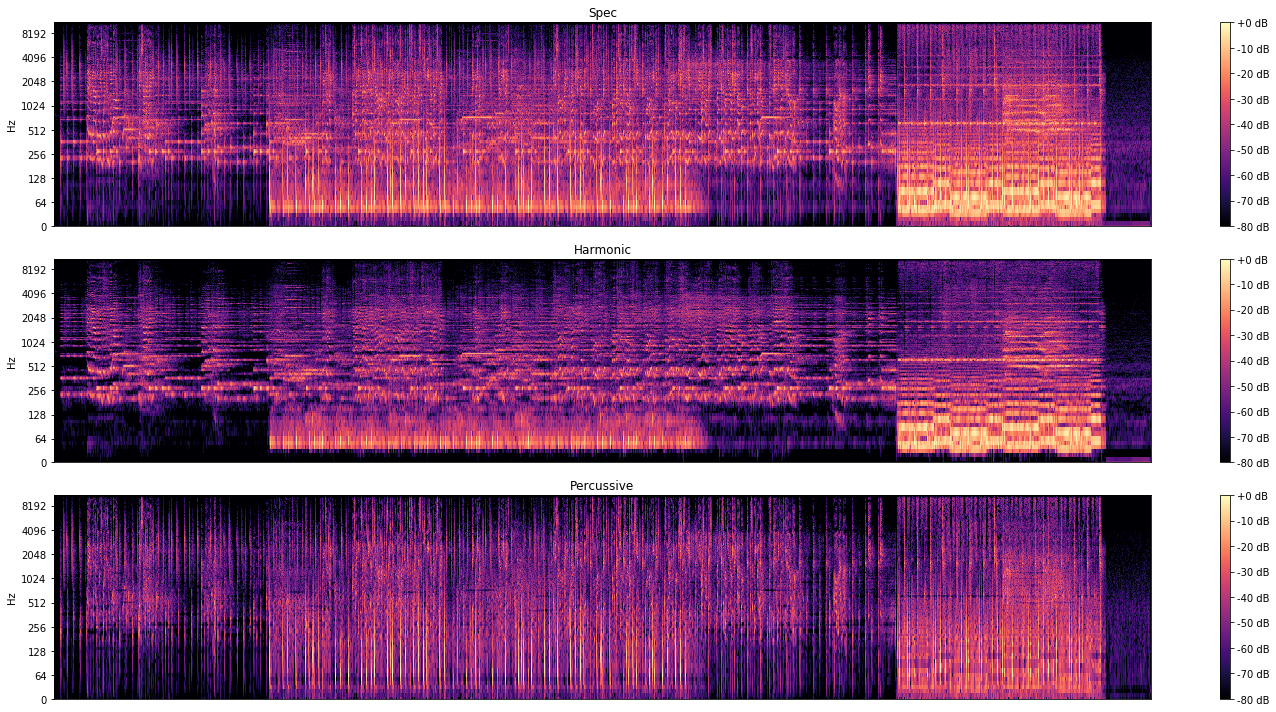

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
dp.specshow(rs.amplitude_to_db(np.abs(D), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spec")
plt.subplot(3, 1, 2)
dp.specshow(rs.amplitude_to_db(np.abs(H), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Harmonic")
plt.subplot(3, 1, 3)
dp.specshow(rs.amplitude_to_db(np.abs(P), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Percussive")
plt.tight_layout()